In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_colwidth", 100)

In [2]:
RESULT_PATH = "../results/stats_pruning_libraries.txt"
RESULT_PATH = "../results/stats_pruning_cedar.txt"
# RESULT_PATH = "../results/stats_pruning_dafnyVMC.txt"
PROJECT = "dafnyVMC"
PROJECT = "cedar"
# PROJECT = "libraries"
RESULT_PATH = f"../results/stats_pruning_{PROJECT}.txt"
df = pd.read_csv(RESULT_PATH)

In [3]:
df.head()

,Index,Original File,Original Method,Original Method Time,Original Method Result,Original Method File,Assertion,Time Difference,New Method File,New Method,New Method Time,New Method Result,New Result File
0,1,/exp/test_projects/cedar-spec/cedar-dafny/validation/subtyping.dfy,StrictSubtyIsStrict,0.887354,Correct,./results/StrictSubtyIsStrict_0.txt,"assert exists k | k in rt2.attrs.Keys :: !subtyAttrType(rt1.attrs[k], rt2.attrs[k], ValidationMo...",NaN,/exp/test_projects/cedar-spec/cedar-dafny/validation/StrictSubtyIsStrict_fix_1.dfy,StrictSubtyIsStrict,0.946377,Errors,./results/StrictSubtyIsStrict_1.txt
1,2,/exp/test_projects/cedar-spec/cedar-dafny/validation/subtyping.dfy,StrictSubtyIsStrict,0.887354,Correct,./results/StrictSubtyIsStrict_0.txt,"assert exists k | k in rt2.attrs.Keys :: !subtyAttrType(rt1.attrs[k], rt2.attrs[k], ValidationMo...",NaN,/exp/test_projects/cedar-spec/cedar-dafny/validation/StrictSubtyIsStrict_fix_2.dfy,StrictSubtyIsStrict,0.948456,Errors,./results/StrictSubtyIsStrict_2.txt
2,3,/exp/test_projects/cedar-spec/cedar-dafny/validation/subtyping.dfy,StrictTypeLub,1.032564,Correct,./results/StrictTypeLub_0.txt,assert e1 == e1.union(e2);\n,NaN,/exp/test_projects/cedar-spec/cedar-dafny/validation/StrictTypeLub_fix_3.dfy,StrictTypeLub,1.179294,Errors,./results/StrictTypeLub_3.txt
3,4,/exp/test_projects/cedar-spec/cedar-dafny/validation/subtyping.dfy,StrictTypeLub,1.032564,Correct,./results/StrictTypeLub_0.txt,"assert strict_attrs == lubRecordType(rt1, rt2, ValidationMode.Strict).value.attrs;\n",NaN,/exp/test_projects/cedar-spec/cedar-dafny/validation/StrictTypeLub_fix_4.dfy,StrictTypeLub,1.027387,Errors,./results/StrictTypeLub_4.txt
4,5,/exp/test_projects/cedar-spec/cedar-dafny/validation/subtyping.dfy,LubUndefUbUndef,1.155167,Correct,./results/LubUndefUbUndef_0.txt,"assert lubRecordType(rt1, rt2, ValidationMode.Strict).Err?;\n",NaN,/exp/test_projects/cedar-spec/cedar-dafny/validation/LubUndefUbUndef_fix_5.dfy,LubUndefUbUndef,1.158310,Errors,./results/LubUndefUbUndef_5.txt


In [4]:
FILEPATH_NON_VERIFIED = f"../results/non_verified_{PROJECT}.csv"
nan_count = df["Time Difference"].isna().sum()
print(f"Total number of assert removed: {nan_count}/{len(df)}")
df_non_verified = df[df["Time Difference"].isna()]
df_non_verified.to_csv(FILEPATH_NON_VERIFIED, index=False)
df_non_verified

Total number of assert removed: 111/732


,Index,Original File,Original Method,Original Method Time,Original Method Result,Original Method File,Assertion,Time Difference,New Method File,New Method,New Method Time,New Method Result,New Result File
0,1,/exp/test_projects/cedar-spec/cedar-dafny/validation/subtyping.dfy,StrictSubtyIsStrict,0.887354,Correct,./results/StrictSubtyIsStrict_0.txt,"assert exists k | k in rt2.attrs.Keys :: !subtyAttrType(rt1.attrs[k], rt2.attrs[k], ValidationMo...",NaN,/exp/test_projects/cedar-spec/cedar-dafny/validation/StrictSubtyIsStrict_fix_1.dfy,StrictSubtyIsStrict,0.946377,Errors,./results/StrictSubtyIsStrict_1.txt
1,2,/exp/test_projects/cedar-spec/cedar-dafny/validation/subtyping.dfy,StrictSubtyIsStrict,0.887354,Correct,./results/StrictSubtyIsStrict_0.txt,"assert exists k | k in rt2.attrs.Keys :: !subtyAttrType(rt1.attrs[k], rt2.attrs[k], ValidationMo...",NaN,/exp/test_projects/cedar-spec/cedar-dafny/validation/StrictSubtyIsStrict_fix_2.dfy,StrictSubtyIsStrict,0.948456,Errors,./results/StrictSubtyIsStrict_2.txt
2,3,/exp/test_projects/cedar-spec/cedar-dafny/validation/subtyping.dfy,StrictTypeLub,1.032564,Correct,./results/StrictTypeLub_0.txt,assert e1 == e1.union(e2);\n,NaN,/exp/test_projects/cedar-spec/cedar-dafny/validation/StrictTypeLub_fix_3.dfy,StrictTypeLub,1.179294,Errors,./results/StrictTypeLub_3.txt
3,4,/exp/test_projects/cedar-spec/cedar-dafny/validation/subtyping.dfy,StrictTypeLub,1.032564,Correct,./results/StrictTypeLub_0.txt,"assert strict_attrs == lubRecordType(rt1, rt2, ValidationMode.Strict).value.attrs;\n",NaN,/exp/test_projects/cedar-spec/cedar-dafny/validation/StrictTypeLub_fix_4.dfy,StrictTypeLub,1.027387,Errors,./results/StrictTypeLub_4.txt
4,5,/exp/test_projects/cedar-spec/cedar-dafny/validation/subtyping.dfy,LubUndefUbUndef,1.155167,Correct,./results/LubUndefUbUndef_0.txt,"assert lubRecordType(rt1, rt2, ValidationMode.Strict).Err?;\n",NaN,/exp/test_projects/cedar-spec/cedar-dafny/validation/LubUndefUbUndef_fix_5.dfy,LubUndefUbUndef,1.158310,Errors,./results/LubUndefUbUndef_5.txt
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,890,/exp/test_projects/cedar-spec/cedar-dafny/def/ext/ipaddr.dfy,CountDCLast,0.521292,Correct,./results/CountDCLast_0.txt,assert wrapNumSegs(s)+[DC] == wrapNumSegs([s[0]]) + (wrapNumSegs(s[1..]) + [DC]);\n,NaN,/exp/test_projects/cedar-spec/cedar-dafny/def/ext/CountDCLast_fix_890.dfy,CountDCLast,0.523966,Errors,./results/CountDCLast_890.txt
726,891,/exp/test_projects/cedar-spec/cedar-dafny/def/ext/ipaddr.dfy,CountDCComp,0.547736,Correct,./results/CountDCComp_0.txt,assert l + r == r;\n,NaN,/exp/test_projects/cedar-spec/cedar-dafny/def/ext/CountDCComp_fix_891.dfy,CountDCComp,0.563452,Errors,./results/CountDCComp_891.txt
727,892,/exp/test_projects/cedar-spec/cedar-dafny/def/ext/ipaddr.dfy,CountDCComp,0.547736,Correct,./results/CountDCComp_0.txt,assert l + r == [l[0]] + (l[1..] + r);\n,NaN,/exp/test_projects/cedar-spec/cedar-dafny/def/ext/CountDCComp_fix_892.dfy,CountDCComp,0.518616,Errors,./results/CountDCComp_892.txt
728,893,/exp/test_projects/cedar-spec/cedar-dafny/def/ext/ipaddr.dfy,CountDC1SepMeansNoDc,0.554401,Correct,./results/CountDC1SepMeansNoDc_0.txt,assert segs == segs[0..idx.value+1] + segs[idx.value+1..];\n,NaN,/exp/test_projects/cedar-spec/cedar-dafny/def/ext/CountDC1SepMeansNoDc_fix_893.dfy,CountDC1SepMeansNoDc,0.625767,Errors,./results/CountDC1SepMeansNoDc_893.txt


In [5]:
selected_rows = pd.DataFrame()
FILEPATH_NON_VERIFIED_SAMPLE10 = f"../results/non_verified_{PROJECT}_sample_10.csv"

while len(selected_rows) < 10:
    print("test")
    # Shuffle the DataFrame
    shuffled_df = df_non_verified.sample(frac=1)

    for _, row in shuffled_df.iterrows():
        # Check if 'Original Method' value is not already in selected_rows
        if "Original Method" not in selected_rows or (
            "Original Method" in selected_rows
            and row["Original Method"] not in selected_rows["Original Method"].values
        ):
            # Append the row to selected_rows
            # selected_rows = selected_rows.concat(row, ignore_index=True)
            selected_rows = pd.concat(
                [selected_rows, row.to_frame().transpose()], ignore_index=True
            )

            # Break the loop if 10 unique rows are collected
            if len(selected_rows) == 10:
                break
# selected_rows.to_csv(FILEPATH_NON_VERIFIED_SAMPLE10, index=False)
selected_rows

test


,Index,Original File,Original Method,Original Method Time,Original Method Result,Original Method File,Assertion,Time Difference,New Method File,New Method,New Method Time,New Method Result,New Result File
0,49,/exp/test_projects/cedar-spec/cedar-dafny/validation/thm/model.dfy,OrSafe,2.319476,Correct,./results/OrSafe_0.txt,"assert Evaluator(r,s).interpretShortcircuit(Or(e,e'),e,e',true) == Evaluate(e,r,s);\n",NaN,/exp/test_projects/cedar-spec/cedar-dafny/validation/thm/OrSafe_fix_49.dfy,OrSafe,2.734827,Errors,./results/OrSafe_49.txt
1,6,/exp/test_projects/cedar-spec/cedar-dafny/validation/subtyping.dfy,LubUndefUbUndef,1.155167,Correct,./results/LubUndefUbUndef_0.txt,"assert lubRecordType(rt1, rt2, ValidationMode.Permissive).Ok?;\n",NaN,/exp/test_projects/cedar-spec/cedar-dafny/validation/LubUndefUbUndef_fix_6.dfy,LubUndefUbUndef,1.057981,Errors,./results/LubUndefUbUndef_6.txt
2,17,/exp/test_projects/cedar-spec/cedar-dafny/validation/subtyping.dfy,StrictLubIsStrict,1.916766,Correct,./results/StrictLubIsStrict_0.txt,"assert strict_attrs == lubRecordType(rt1, rt2, ValidationMode.Strict).value.attrs;\n",NaN,/exp/test_projects/cedar-spec/cedar-dafny/validation/StrictLubIsStrict_fix_17.dfy,StrictLubIsStrict,2.390899,Errors,./results/StrictLubIsStrict_17.txt
3,61,/exp/test_projects/cedar-spec/cedar-dafny/validation/thm/model.dfy,AndSafe,2.349787,Correct,./results/AndSafe_0.txt,"assert Evaluator(r,s).interpretShortcircuit(And(e,e'),e,e',false) == Evaluate(e',r,s);\n",NaN,/exp/test_projects/cedar-spec/cedar-dafny/validation/thm/AndSafe_fix_61.dfy,AndSafe,3.147736,Errors,./results/AndSafe_61.txt
4,8,/exp/test_projects/cedar-spec/cedar-dafny/validation/subtyping.dfy,LubIsUB,1.804894,Correct,./results/LubIsUB_0.txt,assert t1 == t; SubtyRefl(t);\n,NaN,/exp/test_projects/cedar-spec/cedar-dafny/validation/LubIsUB_fix_8.dfy,LubIsUB,1.895154,Errors,./results/LubIsUB_8.txt
5,802,/exp/test_projects/cedar-spec/cedar-dafny/validation/thm/soundness.dfy,SoundMulBy,7.780813,Correct,./results/SoundMulBy_0.txt,"assert TC.ensureIntType(e,effs).Ok?;\n",NaN,/exp/test_projects/cedar-spec/cedar-dafny/validation/thm/SoundMulBy_fix_802.dfy,SoundMulBy,6.998867,Errors,./results/SoundMulBy_802.txt
6,751,/exp/test_projects/cedar-spec/cedar-dafny/validation/thm/soundness.dfy,SoundLike,5.853363,Correct,./results/SoundLike_0.txt,"assert TC.ensureStringType(e,effs).Ok?;\n",NaN,/exp/test_projects/cedar-spec/cedar-dafny/validation/thm/SoundLike_fix_751.dfy,SoundLike,8.195473,Errors,./results/SoundLike_751.txt
7,109,/exp/test_projects/cedar-spec/cedar-dafny/validation/thm/model.dfy,OrRShortSafe,2.527918,Correct,./results/OrRShortSafe_0.txt,"assert Evaluator(r,s).interpretShortcircuit(Or(e,e'),e,e',true) == Evaluate(e',r,s);\n",NaN,/exp/test_projects/cedar-spec/cedar-dafny/validation/thm/OrRShortSafe_fix_109.dfy,OrRShortSafe,2.6312,Errors,./results/OrRShortSafe_109.txt
8,75,/exp/test_projects/cedar-spec/cedar-dafny/validation/thm/model.dfy,AndLRetSafe,2.427302,Correct,./results/AndLRetSafe_0.txt,"assert Evaluator(r,s).interpretShortcircuit(And(e,e'),e,e',false) == Evaluate(e',r,s);\n",NaN,/exp/test_projects/cedar-spec/cedar-dafny/validation/thm/AndLRetSafe_fix_75.dfy,AndLRetSafe,3.14649,Errors,./results/AndLRetSafe_75.txt
9,87,/exp/test_projects/cedar-spec/cedar-dafny/validation/thm/model.dfy,AndRShortSafe,2.483498,Correct,./results/AndRShortSafe_0.txt,"assert Evaluator(r,s).interpretShortcircuit(And(e,e'),e,e',false) == Evaluate(e',r,s);\n",NaN,/exp/test_projects/cedar-spec/cedar-dafny/validation/thm/AndRShortSafe_fix_87.dfy,AndRShortSafe,2.692568,Errors,./results/AndRShortSafe_87.txt


In [6]:
df

,Index,Original File,Original Method,Original Method Time,Original Method Result,Original Method File,Assertion,Time Difference,New Method File,New Method,New Method Time,New Method Result,New Result File
0,1,/exp/test_projects/cedar-spec/cedar-dafny/validation/subtyping.dfy,StrictSubtyIsStrict,0.887354,Correct,./results/StrictSubtyIsStrict_0.txt,"assert exists k | k in rt2.attrs.Keys :: !subtyAttrType(rt1.attrs[k], rt2.attrs[k], ValidationMo...",NaN,/exp/test_projects/cedar-spec/cedar-dafny/validation/StrictSubtyIsStrict_fix_1.dfy,StrictSubtyIsStrict,0.946377,Errors,./results/StrictSubtyIsStrict_1.txt
1,2,/exp/test_projects/cedar-spec/cedar-dafny/validation/subtyping.dfy,StrictSubtyIsStrict,0.887354,Correct,./results/StrictSubtyIsStrict_0.txt,"assert exists k | k in rt2.attrs.Keys :: !subtyAttrType(rt1.attrs[k], rt2.attrs[k], ValidationMo...",NaN,/exp/test_projects/cedar-spec/cedar-dafny/validation/StrictSubtyIsStrict_fix_2.dfy,StrictSubtyIsStrict,0.948456,Errors,./results/StrictSubtyIsStrict_2.txt
2,3,/exp/test_projects/cedar-spec/cedar-dafny/validation/subtyping.dfy,StrictTypeLub,1.032564,Correct,./results/StrictTypeLub_0.txt,assert e1 == e1.union(e2);\n,NaN,/exp/test_projects/cedar-spec/cedar-dafny/validation/StrictTypeLub_fix_3.dfy,StrictTypeLub,1.179294,Errors,./results/StrictTypeLub_3.txt
3,4,/exp/test_projects/cedar-spec/cedar-dafny/validation/subtyping.dfy,StrictTypeLub,1.032564,Correct,./results/StrictTypeLub_0.txt,"assert strict_attrs == lubRecordType(rt1, rt2, ValidationMode.Strict).value.attrs;\n",NaN,/exp/test_projects/cedar-spec/cedar-dafny/validation/StrictTypeLub_fix_4.dfy,StrictTypeLub,1.027387,Errors,./results/StrictTypeLub_4.txt
4,5,/exp/test_projects/cedar-spec/cedar-dafny/validation/subtyping.dfy,LubUndefUbUndef,1.155167,Correct,./results/LubUndefUbUndef_0.txt,"assert lubRecordType(rt1, rt2, ValidationMode.Strict).Err?;\n",NaN,/exp/test_projects/cedar-spec/cedar-dafny/validation/LubUndefUbUndef_fix_5.dfy,LubUndefUbUndef,1.158310,Errors,./results/LubUndefUbUndef_5.txt
...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,892,/exp/test_projects/cedar-spec/cedar-dafny/def/ext/ipaddr.dfy,CountDCComp,0.547736,Correct,./results/CountDCComp_0.txt,assert l + r == [l[0]] + (l[1..] + r);\n,NaN,/exp/test_projects/cedar-spec/cedar-dafny/def/ext/CountDCComp_fix_892.dfy,CountDCComp,0.518616,Errors,./results/CountDCComp_892.txt
728,893,/exp/test_projects/cedar-spec/cedar-dafny/def/ext/ipaddr.dfy,CountDC1SepMeansNoDc,0.554401,Correct,./results/CountDC1SepMeansNoDc_0.txt,assert segs == segs[0..idx.value+1] + segs[idx.value+1..];\n,NaN,/exp/test_projects/cedar-spec/cedar-dafny/def/ext/CountDC1SepMeansNoDc_fix_893.dfy,CountDC1SepMeansNoDc,0.625767,Errors,./results/CountDC1SepMeansNoDc_893.txt
729,894,/exp/test_projects/cedar-spec/cedar-dafny/def/ext/ipaddr.dfy,CountDC1SepMeansNoDc,0.554401,Correct,./results/CountDC1SepMeansNoDc_0.txt,assert countDC(segs[0..idx.value+1]) + countDC(segs[idx.value+1..]) == countDC(segs);\n,0.009877,/exp/test_projects/cedar-spec/cedar-dafny/def/ext/CountDC1SepMeansNoDc_fix_894.dfy,CountDC1SepMeansNoDc,0.544524,Correct,./results/CountDC1SepMeansNoDc_894.txt
730,895,/exp/test_projects/cedar-spec/cedar-dafny/def/ext/ipaddr.dfy,CountDC1SepMeansNoDc,0.554401,Correct,./results/CountDC1SepMeansNoDc_0.txt,assert segs[0..idx.value+1] == segs[0..idx.value] + [segs[idx.value]];\n,NaN,/exp/test_projects/cedar-spec/cedar-dafny/def/ext/CountDC1SepMeansNoDc_fix_895.dfy,CountDC1SepMeansNoDc,0.596214,Errors,./results/CountDC1SepMeansNoDc_895.txt


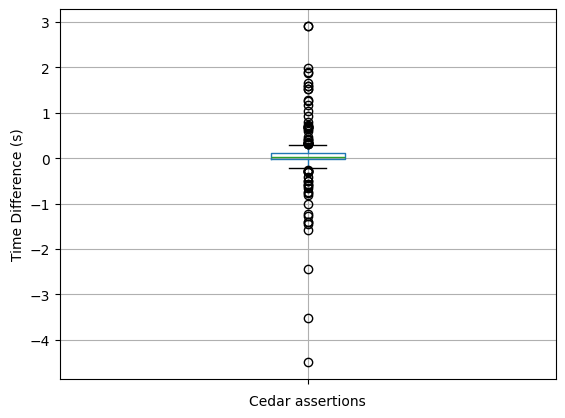

In [23]:
ax = df.boxplot(column=["Time Difference"])

ax.set_xticklabels([])
# Add labels and title
plt.ylabel("Time Difference (s)")
plt.xlabel("Cedar assertions")  # Replace the column name with "Cedar"
# plt.title("Box Plot of Time Difference")
plt.savefig(f"../results/boxplot_{PROJECT}.png")
# Show the plot
plt.show()

In [8]:
THRESHOLD = 0.1
over_threshold = (df["Time Difference"] > THRESHOLD).sum()
count_under_threshold = (df["Time Difference"] < -THRESHOLD).sum()

print(f"Number of assert removed over threshold: {over_threshold}/{len(df)}")
print(f"Number of assert removed under threshold: {count_under_threshold}/{len(df)}")

over_threshold

Number of assert removed over threshold: 159/732
Number of assert removed under threshold: 55/732


159

In [9]:
df["New Method Result"].value_counts()

New Method Result
Correct    621
Errors     111
Name: count, dtype: int64